
0: 320x640 9 2-way-control_valves, 6 3-way-control_valves, 1 analogue_relative_humidity_sensor, 3 damper_offs, 1 digital_differential_pressure_sensor, 1 digital_temperature_sensor, 1 discharge_well, 1 frequency_inverter_off, 13 heat_exchangers, 2 pump_offs, 3 pump_ons, 5.7ms
Speed: 1.1ms preprocess, 5.7ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
Saved high-confidence image → /home/ghazal-2earzanian/image/Image/predict.png


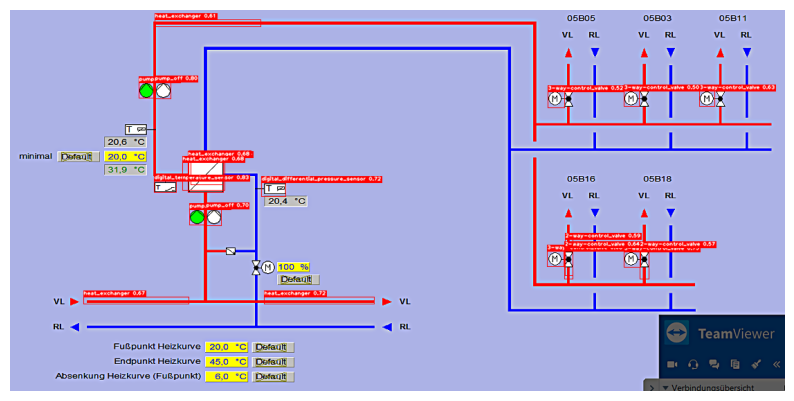

In [20]:
# ------------ 0. imports -------------------------------------------------
from ultralytics import YOLO
import cv2, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# ------------ 1. load model and run prediction (no auto-draw) -----------
model = YOLO('runs/detect/train10/weights/best.pt')

im = Image.open('cropped_enhanced/Bild19.PNG')

# ►► OPTION A: built-in filtering ────────────
#     results = model.predict(im, imgsz=640, conf=0.60,
#                             save=False, show=False)

# ►► OPTION B: get everything, filter later ──
results = model.predict(im, imgsz=640, save=False, show=False)

# choose either A or B (comment the other)

# ------------ 2. copy original frame (BGR) ------------------------------
frame = results[0].orig_img.copy()

# ------------ 3. prepare arrays and drawing parameters ------------------
boxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype(int)
scores     = results[0].boxes.conf.cpu().numpy()
class_ids  = results[0].boxes.cls.cpu().numpy().astype(int)
names      = results[0].names

font, scale, thick   = cv2.FONT_HERSHEY_PLAIN, 0.5, 1
box_thick            = 1
conf_thresh          = 0.50   # ← keep ≥ 60 %

# ------------ 4. draw only high-confidence detections -------------------
for (x1, y1, x2, y2), score, cid in zip(boxes_xyxy, scores, class_ids):
    if score < conf_thresh:           # manual filter (needed only for Option B)
        continue

    label = f'{names[cid]} {score:.2f}'
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0,0,255), box_thick)

    (w, h), bl = cv2.getTextSize(label, font, scale, thick)
    cv2.rectangle(frame, (x1, y1-h-bl), (x1+w, y1), (0,0,255), cv2.FILLED)
    cv2.putText(frame, label, (x1, y1-bl), font, scale,
                (255,255,255), thick, cv2.LINE_AA)

# ------------ 5. save to disk -------------------------------------------
out_path = Path('predict.png')
cv2.imwrite(str(out_path), frame)
print(f'Saved high-confidence image → {out_path.resolve()}')

# ------------ 6. inline preview -----------------------------------------
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
